In [123]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('#toggleButton').val('Show Code')
 } else {
 $('div.input').show();
 $('#toggleButton').val('Hide Code')
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" id = "toggleButton" value="Hide Code"></form>''')

In [4]:
import numpy as np
from matplotlib import pylab as plt

<h1><center>Lesson 1: Overview of A/B Testing</center></h1>

## <center>What is A/B Testing?

* A general methodology used online to test a new product or feature before deploying it. 
* We show 2 groups of users 2 different versions of the product. 
<br>
<br> <b>Control Group</b> is shown existing product and 
<br> <b>Treatment Group</b> is shown the variation we need to test.


<img src="_images/ab-testing.png" style = "width:350px;height:200px;">

We measure how differently the 2 sets respond to determine if the new version is better and worth deploying.


## <center>What can A/B testing NOT be used for?

> <i>"A/B Testing helps you climb to the peak of your current mountain, but can't help you choose between 2 mountains" - John Lily</i>

* Not useful for testing a completely new experience. 
    + There is no comparison baseline if new experience completely different than current
    + It is tough to say how long users would need to get used to new experience
    
* Does not tell if you're completely missing another thing you could be doing

* Not effective for testing new premium service: Since users Opt-In for premium, no random control group to compare

* When change is emotional (eg. new brand logo) short window of time not useful.




## <center>Alternatives when A/B Testing cannot be used:

* Check logs, test hypothesis and then run A/B Test
* Use other techniques: User Experience Research, Focus Groups and Surveys, etc.


## <center>How to setup an A/B Test?

Example:
<br>    
<b>Experiement Setup: </b> Change the color of Start Now button 
<img src="_images/start_now.png" style = "width:500px;height:100px;">

<b>Hypothesis:</b> Changing the colow of 'Start Now' button will increase how many students explore Audacity Courses

## <center>How to perform an A/B Test?


### 1. Choose a metric to evaluate the test

&#x2612; Total No. of Courses completed: This will take too long 
<br>&#x2612; No. of clicks by a user: Some users may click too many times
<br>&#x2612; Click Through Rate (CTR) = # Clicks / # Page Views : Does not account for how many users visited.
<br><b>&#x2611; Click Through Probability: Unique Visitors who click / Unique visitors to page</b>
> Rate is used to measure usability <br>
> Probability is used to measure impact


<li><b> Updated Hypothesis:</b> Changing the color of the 'Start Now' button will increase click through probability





### 2. Review Statistics
#### How many visitors would be a surprising number of visitors?


#### A] Depends on the distribution of the data:

* In the case of click/no click, the distribution to use is a binomial distribution. 
* Binomial can be used when:
    
    + 2 outcome types: success/fail 
    + Independant events
    + Identical Distribution
     
* Let's simulate 50 coin flips a 10 times and look at the distribution




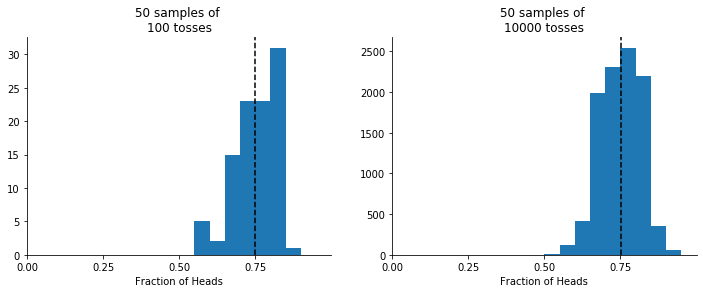

In [83]:
np.random.seed(45)

p=0.75

n1=50
size=100
x1=np.random.binomial(n=n1, p=p, size=size)
x1=x1/50

n2=50
size=10000
x2=np.random.binomial(n=n2, p=p, size=size)
x2=x2/50


plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
plt.hist(x1,bins=np.arange(0, 1, 0.05))
plt.xlim(0,1)
plt.xticks(np.arange(0, 1, 0.25))
plt.xlabel('Fraction of Heads')
plt.title('50 samples of \n100 tosses')
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.axvline(x1.mean(), color = 'black', ls='--')


ax2 = plt.subplot(122)
plt.hist(x2, bins = np.arange(0, 1, 0.05))
plt.xlim(0,1)
plt.xticks(np.arange(0, 1, 0.25))
plt.xlabel('Fraction of Heads')
plt.title('50 samples of \n10000 tosses')
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.axvline(x2.mean(), color = 'black', ls='--')




plt.show()

<li> As N increases, binomial approaches normal distribution.

$$
S.D. = \sqrt\frac{p(1-p)}{N}
$$

    
    
<center>$\mu$ = p

Given that it is binomial, look at the sample standard error for binomial and compare to results to determine if they are surprising.

#### B] Depends on the distribution of the data which will give us the confidence interval:

#### Confidence Interval for a sample


Estimated probability of a click:


$\hat{p} = \frac{X}{N}$

Eg: N = 1000, X = 100, <br><br>
$\hat{p}$ = 0.1 <br>

Probability estimated from the sample will have a margin of error from actual probability over entire population:

<img src="_images/moe.png" style = "width:350px;height:200px;">

<br><br> <b>Thumbrule:</b> <br>
If N * $\hat{p}$ > 5 or N * (1-$\hat{p}$) > 5, <br>Use Normal Distribution

For a Normal Distribution

m = Z x S.E.
<br> 

= Z x $\sqrt\frac{\hat(p)(1-\hat(p))}{N}$

<br>

<li> When No. of samples is large, S.E. is smaller, distribution is tighter, C.I. smaller

<li> When $\hat(p)$ is farther from 0.5, S.E. is smaller, distribution is tighter, C.I. smaller




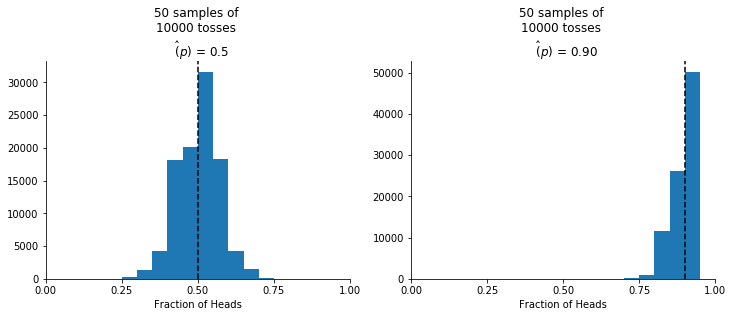

In [22]:
np.random.seed(45)

p1=0.5
p2 = 0.90

n1=50
size=100000
x1=np.random.binomial(n=n1, p=p1, size=size)
x1=x1/50

n2=50
size=100000
x2=np.random.binomial(n=n2, p=p2, size=size)
x2=x2/50


plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
plt.hist(x1,bins=np.arange(0, 1, 0.05))
plt.xlim(0,1)
plt.xticks(np.arange(0, 1.25, 0.25))
plt.xlabel('Fraction of Heads')
plt.title('50 samples of \n10000 tosses \n  $\hat(p)$ = 0.5')
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.axvline(x1.mean(), color = 'black', ls='--')


ax2 = plt.subplot(122)
plt.hist(x2, bins = np.arange(0, 1, 0.05))
plt.xlim(0,1)
plt.xticks(np.arange(0, 1.25, 0.25))
plt.xlabel('Fraction of Heads')
plt.title('50 samples of \n10000 tosses \n  $\hat(p)$ = 0.90')
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.axvline(x2.mean(), color = 'black', ls='--')




plt.show()

<li> For a Normal Distribution with $\mu$ = 0, $\sigma$ = 1, aka Z distribution

    

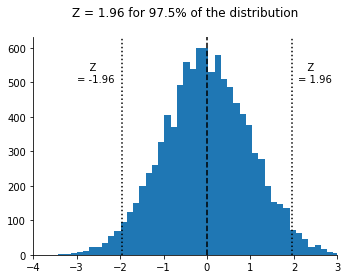

In [80]:
np.random.seed(45)

p1=0

mu, sigma = 0, 1
s = np.random.normal(mu, sigma, 10000)



plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
count, bins, ignored = plt.hist(s, 50)

plt.xlim(0,1.99)
plt.xticks(np.arange(-4, 4, 1))
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax1.axvline(0, color = 'black', ls='--')
ax1.axvline(-1.96, color = 'black', ls=':')
ax1.axvline(1.96, color = 'black', ls=':')

plt.title('Z = 1.96 for 97.5% of the distribution\n')

plt.text(-3,500,'    Z \n= -1.96')
plt.text(2.1,500,'   Z \n= 1.96')

plt.show()

For estimated probability of a click with $\hat(p)$ = 0.1, at a confidence level of 97.5%, Margin of error: <br>

m = 1.96 * (0.1 * 0.9) / 1000 <br>

m = 0.019

So Confidence Interval <br>
C.I. = 0.1 $\pm$ 0.019 





### 3. Design the Experiment


### 4. Analyze the results